In [2]:
import pandas as pd
import matplotlib as plt
from scipy.stats import t
import numpy as np


In [3]:
shadows = pd.read_csv('http://web.stanford.edu/class/stats191/data/groundhog.table')
shadows.to_csv('groundhog.csv', index=False)


In [8]:
shadows = pd.read_csv('groundhog.csv')
rainfall = pd.read_csv('rainfall.csv')

In [10]:
data = pd.merge(left=shadows, right=rainfall, left_on='year', right_on='WY')
data['mean_rainfall'] = data['Total'] / 12

1 sol:

<Axes: title={'center': 'mean_rainfall'}, xlabel='shadow'>

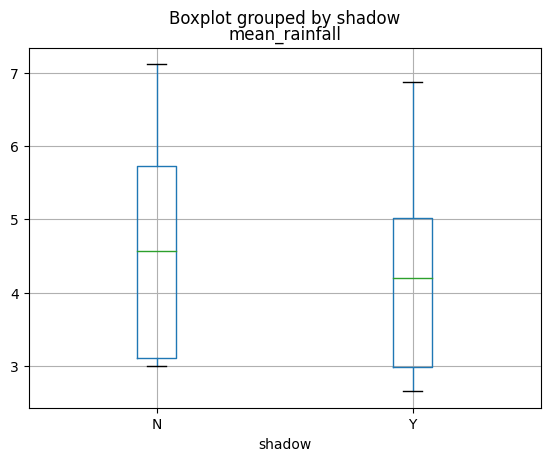

In [11]:
data.boxplot(column='mean_rainfall', by='shadow')

<Axes: >

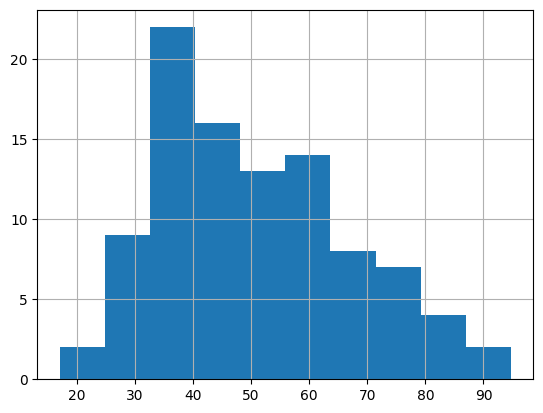

In [12]:
rainfall['Total'].hist()

<Axes: >

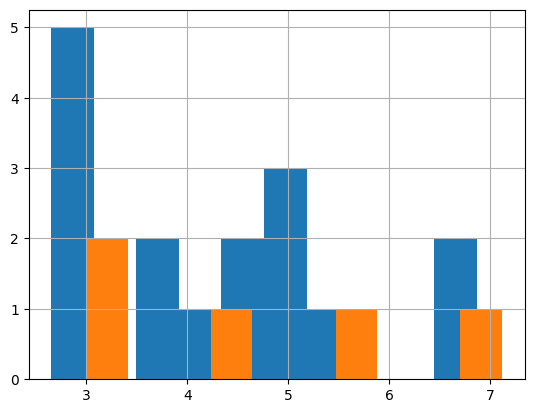

In [13]:
data[data['shadow'] == 'Y']['mean_rainfall'].hist()
data[data['shadow'] == 'N']['mean_rainfall'].hist()

In [14]:
X = data[data['shadow'] == 'N']['mean_rainfall']
Y = data[data['shadow'] == 'Y']['mean_rainfall']

2 sol:  
Asuuming:  
1. $ X_{1}, ... X_{n} \sim \mathcal{N}(\mu_{1}, \sigma^{2}) $ IID are the obsrevation for shadow $=$ N.
2. $ Y_{1}, ... Y_{m} \sim \mathcal{N}(\mu_{2}, \sigma^{2}) $ IID are the obsrevation for shadow $=$ Y.
3. $ X_{i}, Y_{j} $ are independet for every $i, j$.  


We have:  
$ {{\bar{X}_{n} - \bar{Y}_{m} - (\mu{1} - \mu{2})} \over {\sqrt{{{\sigma^{2}  \over n} + {\sigma^{2} \over m}}}}} \sim \mathcal{N}(0,1) $  
and we can derive that:  
$ \sqrt{n+m-2\over {{1\over n} + {1\over m}}} \cdot {{\bar{X}_{n} - \bar{Y}_{m} - (\mu{1} - \mu{2})} \over {\sqrt{{{n S_{X}^{2}} + {m S_{Y}^{2}}}}}} \sim t_{n+m-2} $  
where $ \bar{X}_{n}, \bar{Y}_{m} $ are the sample's means and $ S_{X}^{2}, S_{Y}^{2} $ are the sample's variences (with ddof 0).

In [15]:
confidence = 0.93
alpha = 1 - confidence
n = X.size
m = Y.size
x_mean = X.mean()
y_mean = Y.mean()
x_std_2 = X.var(ddof=0)
y_std_2 = Y.var(ddof=0)
t_crit = t.ppf(1 - alpha/2, n + m - 2)
center = x_mean - y_mean
diff = np.sqrt((n * x_std_2 + m * y_std_2) * (1/n + 1/m) / (n + m - 2))
interval = (center - t_crit * diff, center + t_crit * diff)
print('confidence interval:', interval)



confidence interval: (-1.0117773749153418, 1.8186107082486753)


4 sol:  
We would like to reject $ H_{0}: \mu_{1} = \mu_{2} $  
Under $H_{0}$ we have:
$ \sqrt{n+m-2\over {{1\over n} + {1\over m}}} \cdot {{\bar{X}_{n} - \bar{Y}_{m}} \over {\sqrt{{{n S_{X}^{2}} + {m S_{Y}^{2} }}}}} \sim t_{n+m-2} $  
Denote $ T_{n, m} = \sqrt{n+m-2\over {{1\over n} + {1\over m}}} \cdot {{\bar{X}_{n} - \bar{Y}_{m}} \over {\sqrt{{{n S_{X}^{2}} + {m S_{Y}^{2}}}}}} $  
So we test by $ \varphi_{\alpha}(T_{n, m}) = 1\{|T_{n, m}|\ > q_{1-{\alpha \over 2}}\} $  
and we get that under $ H_{0}$: $ P(\varphi_{\alpha}(T_{n, m}) = 1) = \alpha $.  
Further more, $ p\_ val(T_{n, m}) = 2P(t_{n+m-2} > |T_{n, m}|) $

In [16]:
n = X.size
m = Y.size
x_mean = X.mean()
y_mean = Y.mean()
x_std_2 = X.var(ddof=0)
y_std_2 = Y.var(ddof=0)
T_n_m = np.sqrt((n + m - 2) / ((n * x_std_2 + m * y_std_2) * (1/n + 1/m))) * (x_mean - y_mean)
p_val = 2 * (1- t.cdf(np.abs(T_n_m), n + m - 2))
print('p_val=', p_val)

p_val= 0.5905341699692044


meaning we fail to reject for $ \alpha = 0.05 $

Doing this again using formulas [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm) that doesn't assume equal variance:  
For:  
$s_{p}^{2} = {(n-1)S_{X}^{2} + (m-1)S_{Y}^{2} \over n+m-2}$  

$v = {({{S_{X}^{2} \over n} + {S_{Y}^{2} \over m}})^{2} \over {S_{X}^{4} \over n^{2}(n-1)} + {S_{Y}^{4} \over m^{2}(m-1)}} $

we have:  

$ {\bar{X}_{n} - \bar{Y}_{m} - (\mu_{1} - \mu_{2}) \over s_{p}\sqrt{{1\over n} + {1\over m}}} \sim t_{v} $


(here ddof = 1)

In [17]:
n = X.size
m = Y.size
x_mean = X.mean()
y_mean = Y.mean()
x_std = X.std(ddof=1)
y_std = Y.std(ddof=1)
s_p = np.sqrt(((n-1)*(x_std**2)+(m-1)*(y_std**2)) / (n+m-2))
v = (x_std**2 / n + y_std**2 / m) ** 2 / (x_std**4/(n**2 * (n-1)) + y_std**4/(m**2 * (m-1)))

q2:

In [18]:
confidence = 0.93
alpha = 1 - confidence
t_crit = t.ppf(1 - alpha/2, v)
center = x_mean - y_mean
diff = np.sqrt(1/n + 1/m) * s_p
interval = (center - t_crit * diff, center + t_crit * diff)
print('confidence interval:', interval)

confidence interval: (-1.2481037728505386, 2.054937106183872)


q4:

In [19]:
T_n_m = (x_mean - y_mean) / (s_p * np.sqrt(1/n + 1/m))
p_val = 2 * (1- t.cdf(T_n_m, n + m - 2))
print('p_val=', p_val)

p_val= 0.5905341699692044
